# PEMBENTUKAN PORTOFOLIO META-HEURISTIK MELALUI ANALISIS KLASTER: PERBANDINGAN DENGAN MEAN VARIANCE PADA SAHAM TELEKOMUNIKASI, PERBANKAN, DAN MIGAS


Disusun oleh Kelompok 6:

1. Hanna Safira Choirunisa (22/493710/PA/21211)
2. Sabrina Ayundia Khoirani Putri (22/498133/PA/21486)
3. Zumrotul Inayah (22/498498/PA/21524)

In [ ]:
! pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.0
    Uninstalling typer-0.15.0:
      Successfully uninstalled typer-0.15.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
import random

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from fcmeans import FCM

import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## INPUT DATA SAHAM

In [ ]:
startDate = "2023-11-24"
endDate = "2024-11-26"

### list saham
tickers = ['TLKM.JK', 'ISAT.JK', 'EXCL.JK', 'PGAS.JK', 'MEDC.JK', 'AALI.JK', 'BBRI.JK', 'BMRI.JK', 'BBCA.JK']

In [ ]:
close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    close_df[ticker] = data['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
close_df

,TLKM.JK,ISAT.JK,EXCL.JK,PGAS.JK,MEDC.JK,AALI.JK,BBRI.JK,BMRI.JK,BBCA.JK
Date,,,,,,,,,
2023-11-24,3620.0,2275.00,2080.0,1140.0,1125.0,7025.0,5400.0,5875.0,8925.0
2023-11-27,3680.0,2300.00,2100.0,1145.0,1115.0,7125.0,5350.0,5900.0,8875.0
2023-11-28,3770.0,2287.50,2150.0,1130.0,1145.0,7225.0,5350.0,5900.0,8875.0
2023-11-29,3720.0,2381.25,2160.0,1135.0,1205.0,7175.0,5300.0,5850.0,8900.0
2023-11-30,3760.0,2381.25,2120.0,1115.0,1155.0,7600.0,5275.0,5850.0,8975.0
...,...,...,...,...,...,...,...,...,...
2024-11-19,2780.0,2450.00,2180.0,1505.0,1090.0,6250.0,4360.0,6250.0,9925.0
2024-11-20,2680.0,2380.00,2170.0,1490.0,1140.0,6200.0,4330.0,6225.0,10075.0
2024-11-21,2770.0,2500.00,2210.0,1495.0,1145.0,6175.0,4250.0,6150.0,9850.0


## *RETURN* SAHAM

In [ ]:
### Calculate the daily log returns and drop any NAs
log_ret = np.log(close_df/close_df.shift(1))
log_ret  = log_ret.dropna()

log_ret

,TLKM.JK,ISAT.JK,EXCL.JK,PGAS.JK,MEDC.JK,AALI.JK,BBRI.JK,BMRI.JK,BBCA.JK
Date,,,,,,,,,
2023-11-27,0.016439,0.010929,0.009569,0.004376,-0.008929,0.014135,-0.009302,0.004246,-0.005618
2023-11-28,0.024162,-0.005450,0.023530,-0.013187,0.026550,0.013938,0.000000,0.000000,0.000000
2023-11-29,-0.013351,0.040166,0.004640,0.004415,0.051075,-0.006944,-0.009390,-0.008511,0.002813
2023-11-30,0.010695,0.000000,-0.018692,-0.017778,-0.042379,0.057545,-0.004728,0.000000,0.008392
2023-12-01,0.018446,0.005236,-0.019048,0.004474,-0.026317,-0.016584,0.014118,0.008511,-0.002789
...,...,...,...,...,...,...,...,...,...
2024-11-19,0.070793,0.089612,0.013857,0.026938,0.023203,-0.007968,0.002296,-0.011929,-0.007528
2024-11-20,-0.036634,-0.028988,-0.004598,-0.010017,0.044851,-0.008032,-0.006905,-0.004008,0.015000
2024-11-21,0.033031,0.049190,0.018265,0.003350,0.004376,-0.004040,-0.018649,-0.012121,-0.022586


### *Expected Return* dan *Risk Return* Saham

In [ ]:
mean = log_ret.mean()
risk = log_ret.std()

In [ ]:
stats = pd.DataFrame({
    'Expected Return' : mean,
    'Risk' : risk
})


In [ ]:
stats

,Expected Return,Risk
TLKM.JK,-0.001170,0.017624
ISAT.JK,0.000396,0.023307
EXCL.JK,0.000217,0.020508
PGAS.JK,0.001345,0.019130
MEDC.JK,0.000165,0.025032
AALI.JK,-0.000525,0.014614
BBRI.JK,-0.000794,0.018136
BMRI.JK,0.000473,0.018396
BBCA.JK,0.000551,0.013410


## *Analisis Clustering*

### Penentuan K Optimal

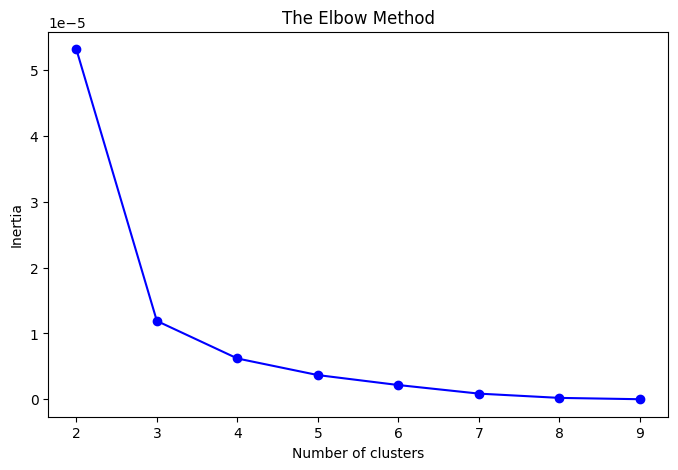

In [ ]:
# elbow method
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(stats)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2,10), inertia, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### K-Means

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42, init='random')
kmeans.fit(stats)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# Menambahkan label klaster ke dalam data
stats_clustered = stats.copy()

stats_clustered['Cluster'] = kmeans.labels_ + 1

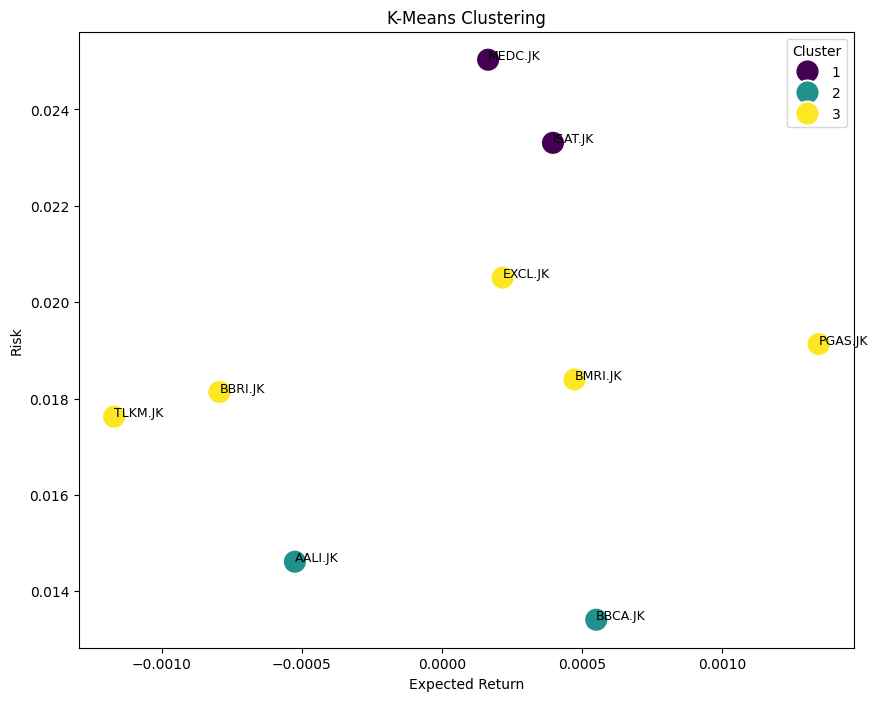

In [ ]:
# Visualisasi hasil clustering

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

sb.scatterplot(data = stats_clustered, x = 'Expected Return', y = 'Risk', hue = 'Cluster', s = 300, ax = ax, palette='viridis')

# Annotate the points with ticker symbols
for i, ticker in enumerate(stats.index):
    ax.annotate(ticker, (stats['Expected Return'].iloc[i], stats['Risk'].iloc[i]), fontsize=9)

plt.title('K-Means Clustering')
plt.show()

In [ ]:
stats_clustered

,Expected Return,Risk,Cluster
TLKM.JK,-0.001170,0.017624,3
ISAT.JK,0.000396,0.023307,1
EXCL.JK,0.000217,0.020508,3
PGAS.JK,0.001345,0.019130,3
MEDC.JK,0.000165,0.025032,1
AALI.JK,-0.000525,0.014614,2
BBRI.JK,-0.000794,0.018136,3
BMRI.JK,0.000473,0.018396,3
BBCA.JK,0.000551,0.013410,2


In [ ]:
cluster_1 = stats_clustered[stats_clustered['Cluster']==1]
cluster_2 = stats_clustered[stats_clustered['Cluster']==2]
cluster_3 = stats_clustered[stats_clustered['Cluster']==3]


saham1 = cluster_1['Expected Return'].idxmax()
saham2 = cluster_2['Expected Return'].idxmax()
saham3 = cluster_3['Expected Return'].idxmax()


In [ ]:
# update list saham
tickers_kmeans = [saham1, saham2, saham3]

tickers_kmeans

['ISAT.JK', 'BBCA.JK', 'PGAS.JK']

### GMM (Gaussian Mixture Models)

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(stats)

# Menambahkan label klaster ke dalam data
stats_clustered = stats.copy()

stats_clustered['Cluster'] = gmm.predict(stats) + 1

print(stats_clustered.Cluster.value_counts())
stats_clustered

Cluster
3    5
1    2
2    2
Name: count, dtype: int64


,Expected Return,Risk,Cluster
TLKM.JK,-0.001170,0.017624,3
ISAT.JK,0.000396,0.023307,1
EXCL.JK,0.000217,0.020508,3
PGAS.JK,0.001345,0.019130,3
MEDC.JK,0.000165,0.025032,1
AALI.JK,-0.000525,0.014614,2
BBRI.JK,-0.000794,0.018136,3
BMRI.JK,0.000473,0.018396,3
BBCA.JK,0.000551,0.013410,2


In [ ]:
# Dapatkan peluang setiap titik data
prob = gmm.predict_proba(stats)

# Tambahkan kolom peluang
for i in range(prob.shape[1]):
    stats_clustered[f'cluster_{i+1}_probability'] = prob[:, i]

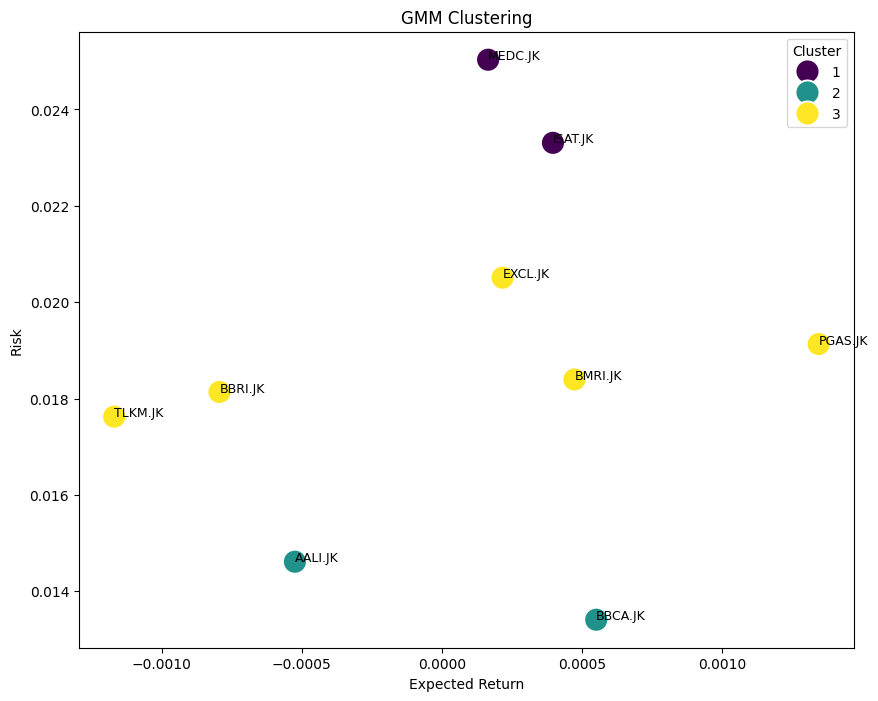

In [ ]:
# Visualisasi hasil clustering

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

sb.scatterplot(data = stats_clustered, x = 'Expected Return', y = 'Risk', hue = 'Cluster', s = 300, ax = ax, palette='viridis')

# Annotate the points with ticker symbols
for i, ticker in enumerate(stats.index):
    ax.annotate(ticker, (stats['Expected Return'].iloc[i], stats['Risk'].iloc[i]), fontsize=9)

plt.title('GMM Clustering')
plt.show()

In [ ]:
cluster_1 = stats_clustered[stats_clustered['Cluster']==1]
cluster_2 = stats_clustered[stats_clustered['Cluster']==2]
cluster_3 = stats_clustered[stats_clustered['Cluster']==3]


saham1 = cluster_1['Expected Return'].idxmax()
saham2 = cluster_2['Expected Return'].idxmax()
saham3 = cluster_3['Expected Return'].idxmax()


In [ ]:
# update list saham
tickers_gmm = [saham1, saham2, saham3]

tickers_gmm

['ISAT.JK', 'BBCA.JK', 'PGAS.JK']

### Fuzzy C-Means

In [ ]:
fcm = FCM(n_clusters = 3)
fcm.fit(stats.values)

# Menambahkan label klaster ke dalam data
stats_clustered = stats.copy()
stats_clustered['Cluster'] = fcm.predict(stats.values) + 1

# Sebaran klaster
print(stats_clustered.Cluster.value_counts())
stats_clustered

Cluster
1    5
2    2
3    2
Name: count, dtype: int64


,Expected Return,Risk,Cluster
TLKM.JK,-0.001170,0.017624,1
ISAT.JK,0.000396,0.023307,2
EXCL.JK,0.000217,0.020508,1
PGAS.JK,0.001345,0.019130,1
MEDC.JK,0.000165,0.025032,2
AALI.JK,-0.000525,0.014614,3
BBRI.JK,-0.000794,0.018136,1
BMRI.JK,0.000473,0.018396,1
BBCA.JK,0.000551,0.013410,3


In [ ]:
# Dapatkan derajat keanggotaan untuk setiap titik data
membership_degrees = fcm.u

# Tambahkan kolom derajat keanggotaan ke DataFrame asli
for i in range(membership_degrees.shape[1]):
    stats_clustered[f'cluster_{i}_membership'] = membership_degrees[:, i]

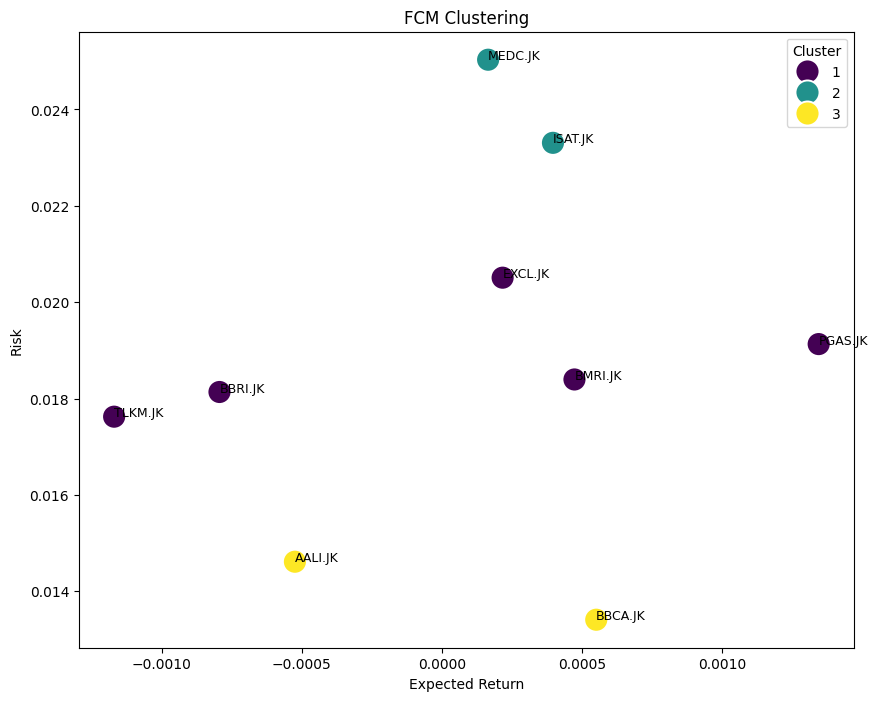

In [ ]:
# Visualisasi hasil clustering

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

sb.scatterplot(data = stats_clustered, x = 'Expected Return', y = 'Risk', hue = 'Cluster', s = 300, ax = ax, palette='viridis')

# Annotate the points with ticker symbols
for i, ticker in enumerate(stats.index):
    ax.annotate(ticker, (stats['Expected Return'].iloc[i], stats['Risk'].iloc[i]), fontsize=9)

plt.title('FCM Clustering')
plt.show()

In [ ]:
cluster_1 = stats_clustered[stats_clustered['Cluster']==1]
cluster_2 = stats_clustered[stats_clustered['Cluster']==2]
cluster_3 = stats_clustered[stats_clustered['Cluster']==3]


saham1 = cluster_1['Expected Return'].idxmax()
saham2 = cluster_2['Expected Return'].idxmax()
saham3 = cluster_3['Expected Return'].idxmax()


In [ ]:
# update list saham
tickers_fcm = [saham1, saham2, saham3]

tickers_fcm

['PGAS.JK', 'ISAT.JK', 'BBCA.JK']

## Optimisasi Portfolio

In [ ]:
# update ticker
tickers_new = ['PGAS.JK', 'ISAT.JK', 'BBCA.JK']
df = close_df[tickers_new]

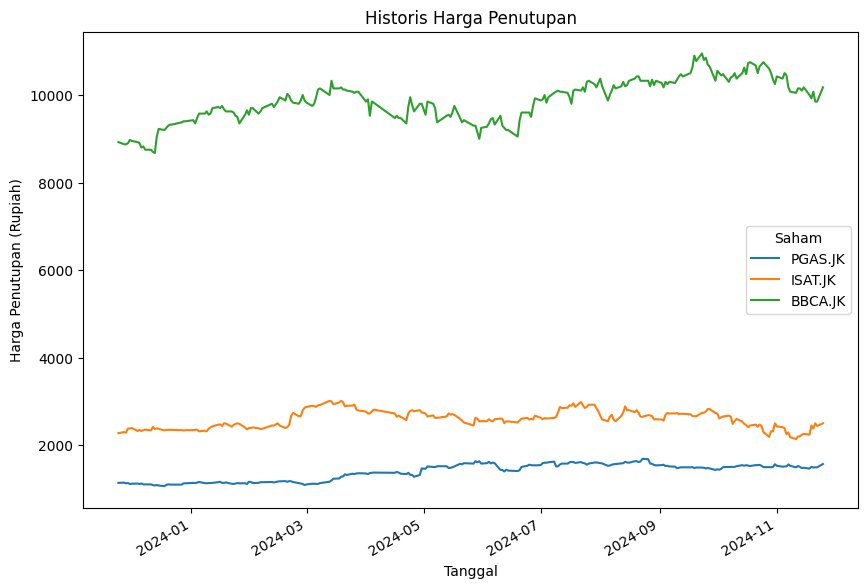

In [ ]:
# Plot the historical adjusted closing prices
df.plot(figsize=(10, 7))
plt.title('Historis Harga Penutupan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Rupiah)')
plt.legend(title='Saham')

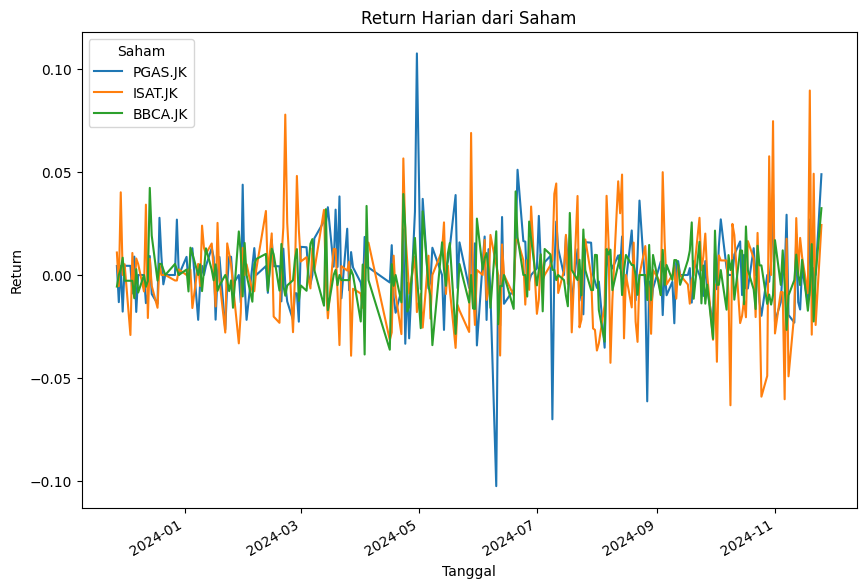

In [ ]:
# Daily returns
returns = log_ret[tickers_new]

# Plot the daily returns
returns.plot(figsize=(10, 7))
plt.title('Return Harian dari Saham')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.legend(title='Saham')

## Mean Variance

In [ ]:
# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Display the mean returns and covariance matrix
print("Mean Returns:")
display(mean_returns)

print("\nCovariance Matrix:\n")
display(cov_matrix)

Mean Returns:


,0
PGAS.JK,0.001345
ISAT.JK,0.000396
BBCA.JK,0.000551



Covariance Matrix:



,PGAS.JK,ISAT.JK,BBCA.JK
PGAS.JK,0.000366,0.000072,0.000003
ISAT.JK,0.000072,0.000543,0.000033
BBCA.JK,0.000003,0.000033,0.000180


risk-free yang digunakan adalah Indo Bond 10 tahun per 25 November 2024 yaitu sebesar 6.872% atau 0.06872

In [ ]:
class PortfolioOptimizer:
    def __init__(self, returns, num_portfolios=10000, risk_free_rate=0.06872):
        self.returns = returns
        self.num_portfolios = num_portfolios
        self.risk_free_rate = risk_free_rate
        self.assets = returns.columns
        self.num_assets = len(self.assets)
        self.portfolio_weights = []
        self.portfolio_expected_returns = []
        self.portfolio_volatilities = []
        self.portfolio_sharpe_ratios = []

    def generate_random_portfolios(self):
        np.random.seed(42)
        random.seed(42)
        for _ in range(self.num_portfolios):
            weights = np.random.random(self.num_assets)
            weights /= np.sum(weights)
            self.portfolio_weights.append(weights)
            expected_return = np.sum(weights * self.returns.mean()) * 239
            self.portfolio_expected_returns.append(expected_return)
            volatility = np.sqrt(np.dot(weights.T, np.dot(self.returns.cov() * 239, weights)))
            self.portfolio_volatilities.append(volatility)
            sharpe_ratio = (expected_return - self.risk_free_rate) / volatility
            self.portfolio_sharpe_ratios.append(sharpe_ratio)

    def get_portfolio_performance(self, weights):
        weights = np.array(weights)
        expected_return = np.sum(weights * self.returns.mean()) * 239
        volatility = np.sqrt(np.dot(weights.T, np.dot(self.returns.cov() * 239, weights)))
        sharpe_ratio = (expected_return - self.risk_free_rate) / volatility
        return expected_return, volatility, sharpe_ratio

    def plot_efficient_frontier(self):
        portfolios = pd.DataFrame({
            'Return': self.portfolio_expected_returns,
            'Volatility': self.portfolio_volatilities,
            'Sharpe Ratio': self.portfolio_sharpe_ratios
        })

        # Plot efficient frontier
        plt.figure(figsize=(10, 7))
        plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis')
        plt.colorbar(label='Sharpe Ratio')
        plt.xlabel('Volatility')
        plt.ylabel('Expected Return')
        plt.title('Efficient Frontier')

        return portfolios

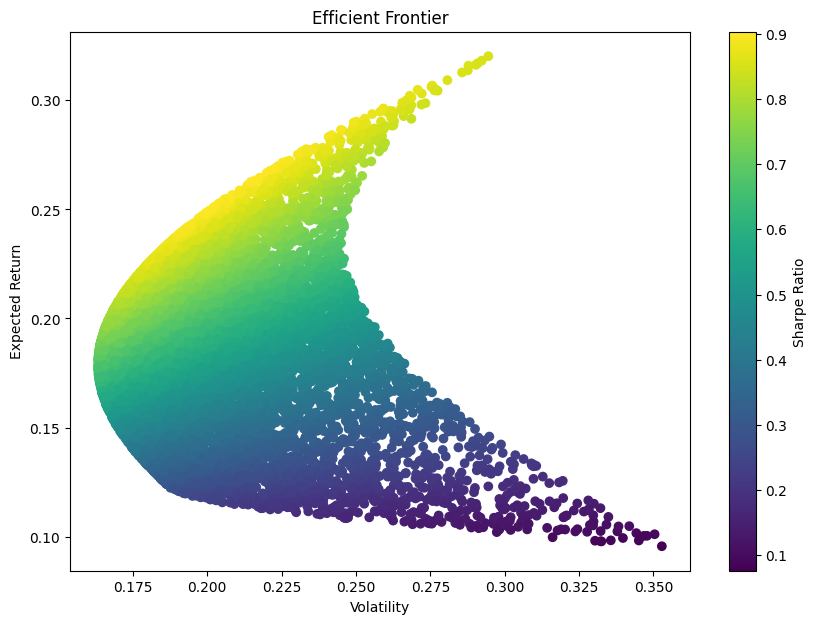

In [ ]:
# Create an instance of PortfolioOptimizer
optimizer = PortfolioOptimizer(returns)

# Generate random portfolios
optimizer.generate_random_portfolios()

# Plot the efficient frontier
portfolios = optimizer.plot_efficient_frontier()

In [ ]:
# Find the portfolio with the highest Sharpe ratio
mvo_idx = np.argmax(optimizer.portfolio_sharpe_ratios)
mvo_sr = optimizer.portfolio_sharpe_ratios[mvo_idx]
mvo_return = optimizer.portfolio_expected_returns[mvo_idx]
mvo_volatility = optimizer.portfolio_volatilities[mvo_idx]
mvo_weights = optimizer.portfolio_weights[mvo_idx]
mvo_weights_series = pd.Series(mvo_weights, index=tickers_new)

print("Performance Portfolio MVO \n")
print(f"Expected Annual Return: {mvo_return * 100:.2f}%")
print(f"Annual Volatility: {mvo_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {mvo_sr:.4f}")

print(f"\nOptimal Portfolio Weights (%): \n{mvo_weights_series*100}")

Performance Portfolio MVO 

Expected Annual Return: 25.45%
Annual Volatility: 20.57%
Sharpe Ratio: 0.9033

Optimal Portfolio Weights (%): 
PGAS.JK    64.760263
ISAT.JK     0.000984
BBCA.JK    35.238753
dtype: float64


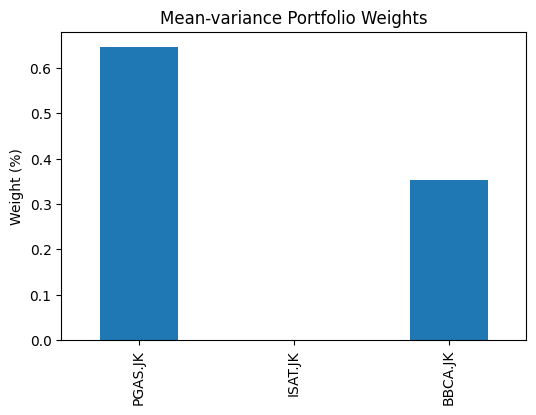

In [ ]:
mvo_weights_series.plot(kind='bar', figsize=(6, 4), title='Mean-variance Portfolio Weights')
plt.ylabel('Weight (%)')
plt.show()

### Menghitung Profit/Loss yang Didapatkan

Selanjutnya ingin dilihat profit/loss yang didapatkan. Seorang investor memiliki **modal Rp 1 milyar** diinvestasikan pada ketiga saham di atas. Saham-saham tersebut **dibeli pada tanggal 26 November 2024** kemudian **dijual tanggal 6 Desember 2024**. Transaksi pembelian dan penjualan saham dilakukan berdasarkan harga saham penutupan pada hari transaksi.

In [ ]:
startDate = "2024-11-26"
endDate = "2024-12-07"

df2 = pd.DataFrame()

for ticker in tickers_new:
    data = yf.download(ticker, start = startDate, end = endDate)
    df2[ticker] = data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df2

,PGAS.JK,ISAT.JK,BBCA.JK
Date,,,
2024-11-26,1535.0,2440.0,10000.0
2024-11-28,1540.0,2370.0,10000.0
2024-11-29,1520.0,2400.0,10000.0
2024-12-02,1570.0,2380.0,9750.0
2024-12-03,1585.0,2510.0,10200.0
2024-12-04,1595.0,2560.0,10200.0
2024-12-05,1570.0,2530.0,10250.0
2024-12-06,1625.0,2500.0,10075.0


In [ ]:
# Modal investasi
initial_investment = 1000000000  # 1 Miliar Rupiah

# Dataframe untuk menyimpan profit/loss harian
profit_loss_mvo = pd.DataFrame(index=df2.index)
used_mvo = {}
shares_bought_mvo = {}
allocation_mvo = {}
buy_price_mvo = {}

for ticker in tickers_new:
    buy_price_mvo[ticker] = df2[ticker].iloc[0]  # Harga beli (harga penutupan 3 Oktober)
    allocation_mvo[ticker] = mvo_weights_series[ticker] * initial_investment  # Alokasi investasi awal

    # Jumlah saham yang dibeli
    shares_bought_mvo[ticker] = np.floor(allocation_mvo[ticker] / buy_price_mvo[ticker])

    # Modal yang digunakan untuk membeli saham
    used_mvo[ticker] = shares_bought_mvo[ticker] * buy_price_mvo[ticker]

    # Menghitung profit/loss harian
    profit_loss_mvo[ticker] = (df2[ticker] - buy_price_mvo[ticker]) * shares_bought_mvo[ticker]

# Menampilkan profit/loss per saham per hari dan total profit/loss per hari
daily_profit_loss_mvo = profit_loss_mvo.loc["2024-11-27":"2024-12-06"].copy()

# Menghitung total profit/loss per hari dari 27 November - 5 Desember 2024
daily_profit_loss_mvo["Total Profit/Loss"] = daily_profit_loss_mvo.loc["2024-11-27":"2024-12-06"].sum(axis=1)


In [ ]:
allocation_mvo = pd.DataFrame({
    "Saham": tickers_new,
    "Lembar": list(shares_bought_mvo.values()),
    "Alokasi (Rupiah)": list(used_mvo.values())
})

allocation_mvo

,Saham,Lembar,Alokasi (Rupiah)
0,PGAS.JK,421890.0,647601150.0
1,ISAT.JK,4.0,9760.0
2,BBCA.JK,35238.0,352380000.0


In [ ]:
remaining_mvo = initial_investment - sum(used_mvo.values())
print(f"Sisa modal : Rp{remaining_mvo:.2f}")

Sisa modal : Rp9090.00


In [ ]:
daily_profit_loss_mvo

,PGAS.JK,ISAT.JK,BBCA.JK,Total Profit/Loss
Date,,,,
2024-11-28,2109450.0,-280.0,0.0,2109170.0
2024-11-29,-6328350.0,-160.0,0.0,-6328510.0
2024-12-02,14766150.0,-240.0,-8809500.0,5956410.0
2024-12-03,21094500.0,280.0,7047600.0,28142380.0
2024-12-04,25313400.0,480.0,7047600.0,32361480.0
2024-12-05,14766150.0,360.0,8809500.0,23576010.0
2024-12-06,37970100.0,240.0,2642850.0,40613190.0


## Particle Swarm Optimization

In [ ]:
def pso_optimize(mean_daily_returns, cov_matrix):
    """
    Function for Particle Swarm Optimization (PSO) to optimize portfolio weights.
    """
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)

    dimensions = 3  # Number of stocks in the portfolio
    iterations = 100  # Number of iterations for PSO
    swarm_size = 500  # Number of particles in the swarm

    # Initialize random positions for particles in the swarm
    swarm_position = []
    for particle in range(swarm_size):
        position = [0] * dimensions  # Size of position vector for a particle
        for dimension in range(dimensions):
            position[dimension] = random.random()  # Random position along each dimension
        swarm_position.append(position)

    # Initialize random velocities for particles in the swarm
    swarm_velocity = []
    for particle in range(swarm_size):
        velocity = [0] * dimensions  # Size of velocity vector for a particle
        for dimension in range(dimensions):
            velocity[dimension] = random.random()
        swarm_velocity.append(velocity)

    swarm_position = np.array([np.array(p) for p in swarm_position])
    swarm_velocity = np.array([np.array(v) for v in swarm_velocity])
    particles_pbest = swarm_position  # Initialize personal best (pbest) positions for all particles
    swarm_gbest = particles_pbest[0]  # Initialize global best (gbest)

    avg_sharpe_list = []
    portfolio_return = []
    portfolio_vol = []
    portfolio_sharpe = []
    portfolio_weights = []

    # PSO iterations
    for iteration in range(iterations):
        sharpe_pbest_all = []  # List to store sharpe ratios of all particles' pbest

        # Loop through all particles
        for particle in range(swarm_size):
            # Update each particle's velocity and position
            for dimension in range(dimensions):
                r1 = random.random()
                r2 = random.random()

                # Time-variant parameters for PSO
                w = (0.9 - 0.4) * ((iterations - iteration) / iterations) + 0.4  # Inertia weight
                c1 = (0.5 - 2.5) * (iteration / iterations) + 2.5  # Cognitive coefficient
                c2 = (2.5 - 0.5) * (iteration / iterations) + 0.5  # Social coefficient

                # Update particle's velocity and position
                swarm_velocity[particle][dimension] = w * swarm_velocity[particle][dimension] + c1 * r1 * np.linalg.norm(
                    particles_pbest[particle][dimension] - swarm_position[particle][dimension]) + c2 * r2 * np.linalg.norm(
                    swarm_gbest[dimension] - swarm_position[particle][dimension])
                swarm_position[particle][dimension] = swarm_position[particle][dimension] + swarm_velocity[particle][dimension]

            # Evaluate the Sharpe ratio of the particle's new position
            sharpe_pbest = sharpe(particles_pbest[particle], mean_daily_returns, cov_matrix)
            if sharpe(swarm_position[particle], mean_daily_returns, cov_matrix) > sharpe_pbest:
                particles_pbest[particle] = swarm_position[particle]  # Update pbest to new position
                sharpe_pbest = sharpe(particles_pbest[particle], mean_daily_returns, cov_matrix)

            sharpe_pbest_all.append(sharpe_pbest)  # Append the Sharpe ratio of pbest for this particle

        # Update global best (gbest) if necessary
        if max(sharpe_pbest_all) > sharpe(swarm_gbest, mean_daily_returns, cov_matrix):
            max_index = sharpe_pbest_all.index(max(sharpe_pbest_all))  # Get index of the best Sharpe ratio
            swarm_gbest = particles_pbest[max_index]  # Update global best to the best particle's position

        # Calculate and store the average Sharpe ratio for the current iteration
        avg_sharpe = sum(sharpe_pbest_all) / len(sharpe_pbest_all)
        avg_sharpe_list.append(avg_sharpe)

        # Evaluate and store portfolio metrics (return, volatility, Sharpe ratio) for the global best
        portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights = optimized_solution(
            iteration, swarm_gbest, mean_daily_returns, cov_matrix, portfolio_return, portfolio_vol, portfolio_sharpe,
            portfolio_weights)

    return avg_sharpe_list, portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights


def sharpe(weights, mean_daily_returns, cov_matrix):
    """
    Function to calculate the Sharpe ratio of the portfolio.
    """
    # Normalize the weights so that they sum to 1
    weights = [w / sum(weights) for w in weights]
    weights = np.matrix(weights)

    # Calculate portfolio return and risk (volatility)
    port_return = np.sum(weights * mean_daily_returns.T) * 239  # 239 trading days in a year
    port_std_dev = np.sqrt(weights * cov_matrix * weights.T) * np.sqrt(239)
    port_std_dev = float(port_std_dev)

    # Sharpe ratio with risk-free rate of
    sharpe_ratio = (port_return - 0.06872) / port_std_dev

    return sharpe_ratio


def optimized_solution(i, weights, mean_daily_returns, cov_matrix, portfolio_return, portfolio_vol, portfolio_sharpe,
                       portfolio_weights):
    """
    Function to print the optimized solution at the end of each iteration.
    """
    # Normalize the weights so that they sum to 1
    weights = [w / sum(weights) for w in weights]
    weights = np.matrix(weights)

    # Calculate portfolio return and risk (volatility)
    port_return = np.sum(weights * mean_daily_returns.T) * 239
    port_std_dev = np.sqrt(weights * cov_matrix * weights.T) * np.sqrt(239)
    port_std_dev = float(port_std_dev)

    # Calculate Sharpe ratio
    sharpe_ratio = (port_return - 0.06872) / port_std_dev

    # Store the portfolio metrics
    portfolio_return.append(port_return)
    portfolio_vol.append(port_std_dev)
    portfolio_sharpe.append(sharpe_ratio)
    portfolio_weights.append(weights)

    return portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights

In [ ]:
mean_daily_returns = np.matrix([mean_returns])
cov_matrix = np.array(cov_matrix)

avg_sharpe_list, portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights = pso_optimize(mean_daily_returns, cov_matrix)

In [ ]:
result_pso = pd.DataFrame({
    'Expected Return' : portfolio_return,
    'Volatilitas' : portfolio_vol,
    'Sharpe Ratio' : portfolio_sharpe,
    'Weights' : portfolio_weights
})

In [ ]:
# Find the portfolio with the highest Sharpe ratio
pso_idx = np.argmax(result_pso['Sharpe Ratio'])
pso_sr = result_pso['Sharpe Ratio'].loc[pso_idx]
pso_return = result_pso['Expected Return'].loc[pso_idx]
pso_vol = result_pso['Volatilitas'].loc[pso_idx]
pso_weights = np.array(result_pso['Weights'].loc[pso_idx]).flatten()
pso_weights_series = pd.Series(pso_weights, index=tickers_new)

print("Performance Portfolio PSO \n")
print(f"Expected Annual Return: {pso_return * 100:.2f}%")
print(f"Annual Volatility: {pso_vol * 100:.2f}%")
print(f"Sharpe Ratio: {pso_sr:.4f}")

print(f"\nOptimal Portfolio Weights (%): \n{pso_weights_series*100}")

Performance Portfolio PSO 

Expected Annual Return: 25.73%
Annual Volatility: 20.88%
Sharpe Ratio: 0.9031

Optimal Portfolio Weights (%): 
PGAS.JK    66.275781
ISAT.JK     0.351005
BBCA.JK    33.373214
dtype: float64


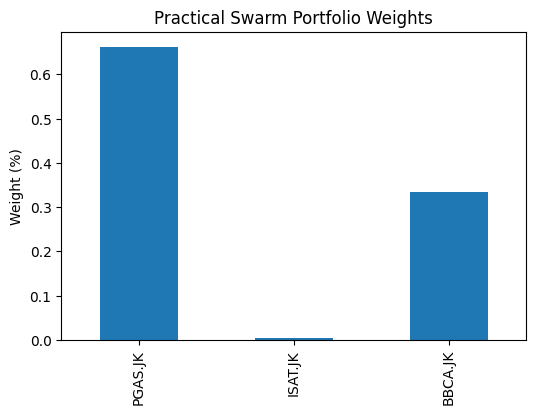

In [ ]:
pso_weights_series.plot(kind='bar', figsize=(6, 4), title='Practical Swarm Portfolio Weights')
plt.ylabel('Weight (%)')
plt.show()

### Menghitung Profit/Loss yang Didapatkan

In [ ]:
# Modal investasi
initial_investment = 1000000000  # 1 Miliar Rupiah

# Dataframe untuk menyimpan profit/loss harian
profit_loss_pso = pd.DataFrame(index=df2.index)
used_pso = {}
shares_bought_pso = {}
allocation_pso = {}
buy_price_pso = {}

for ticker in tickers_new:
    buy_price_pso[ticker] = df2[ticker].iloc[0]  # Harga beli (harga penutupan 3 Oktober)
    allocation_pso[ticker] = pso_weights_series[ticker] * initial_investment  # Alokasi investasi awal

    # Jumlah saham yang dibeli
    shares_bought_pso[ticker] = np.floor(allocation_pso[ticker] / buy_price_pso[ticker])

    # Modal yang digunakan untuk membeli saham
    used_pso[ticker] = shares_bought_pso[ticker] * buy_price_pso[ticker]

    # Menghitung profit/loss harian
    profit_loss_pso[ticker] = (df2[ticker] - buy_price_pso[ticker]) * shares_bought_pso[ticker]

# Menampilkan profit/loss per saham per hari dan total profit/loss per hari
daily_profit_loss_pso = profit_loss_pso.loc["2024-11-27":"2024-12-06"].copy()

# Menghitung total profit/loss per hari dari 27 November - 5 Desember 2024
daily_profit_loss_pso["Total Profit/Loss"] = daily_profit_loss_pso.loc["2024-11-27":"2024-12-06"].sum(axis=1)


In [ ]:
allocation_pso = pd.DataFrame({
    "Saham": tickers_new,
    "Lembar": list(shares_bought_pso.values()),
    "Alokasi (Rupiah)": list(used_pso.values())
})

allocation_pso

,Saham,Lembar,Alokasi (Rupiah)
0,PGAS.JK,431764.0,662757740.0
1,ISAT.JK,1438.0,3508720.0
2,BBCA.JK,33373.0,333730000.0


In [ ]:
remaining_pso = initial_investment - sum(used_pso.values())
print(f"Sisa modal : Rp{remaining_pso:.2f}")

Sisa modal : Rp3540.00


In [ ]:
daily_profit_loss_pso

,PGAS.JK,ISAT.JK,BBCA.JK,Total Profit/Loss
Date,,,,
2024-11-28,2158820.0,-100660.0,0.0,2058160.0
2024-11-29,-6476460.0,-57520.0,0.0,-6533980.0
2024-12-02,15111740.0,-86280.0,-8343250.0,6682210.0
2024-12-03,21588200.0,100660.0,6674600.0,28363460.0
2024-12-04,25905840.0,172560.0,6674600.0,32753000.0
2024-12-05,15111740.0,129420.0,8343250.0,23584410.0
2024-12-06,38858760.0,86280.0,2502975.0,41448015.0


## Artificial Bee Colony (ABC)

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
# Fungsi Sharpe Ratio
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.06872):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return (portfolio_return - risk_free_rate) / portfolio_stddev

# Fungsi untuk Inisialisasi Sumber Makanan (untuk ABC)
def initial_sources(food_sources=3, min_values=[0.0, 0.0, 0.0], max_values=[1.0, 1.0, 1.0], target_function=sharpe_ratio, mean_returns=None, cov_matrix=None):
    sources = np.zeros((food_sources, len(min_values) + 1))
    for i in range(0, food_sources):
        for j in range(0, len(min_values)):
            sources[i, j] = np.random.uniform(min_values[j], max_values[j])  # Ganti random.uniform dengan np.random.uniform
        sources[i, -1] = target_function(sources[i, 0:sources.shape[1]-1], mean_returns, cov_matrix)
    return sources

#  Fungsi untuk Inisialisasi Fitness
def fitness_calc(function_value):
    if(function_value >= 0):
        fitness_value = 1.0 / (1.0 + function_value)
    else:
        fitness_value = 1.0 + abs(function_value)
    return fitness_value

# Fungsi untuk memilih menggunakan Roulette Wheel
def roulette_wheel(fitness):
    ix = 0
    random_val = np.random.random()  # Ganti os.urandom dengan np.random.random() untuk konsistensi
    fitness_cumsum = np.cumsum(fitness)
    for i in range(fitness_cumsum.shape[0]):
        if random_val <= fitness_cumsum[i]:
            ix = i
            break
    return ix

#  Fungsi Employed Bee
def employed_bee(sources, min_values=[0.0, 0.0, 0.0], max_values=[1.0, 1.0, 1.0], target_function=sharpe_ratio, mean_returns=None, cov_matrix=None):
    searching_in_sources = np.copy(sources)
    new_solution = np.zeros((1, len(min_values)))
    trial = np.zeros((sources.shape[0], 1))
    for i in range(0, searching_in_sources.shape[0]):
        phi = np.random.uniform(-1, 1)  # Ganti random.uniform dengan np.random.uniform
        j = np.random.randint(len(min_values), size=1)[0]
        k = np.random.randint(searching_in_sources.shape[0], size=1)[0]
        while i == k:
            k = np.random.randint(searching_in_sources.shape[0], size=1)[0]
        xij = searching_in_sources[i, j]
        xkj = searching_in_sources[k, j]
        vij = xij + phi * (xij - xkj)
        new_solution[0, j] = np.clip(vij, min_values[j], max_values[j])
        new_function_value = target_function(new_solution[0, 0:new_solution.shape[1]], mean_returns, cov_matrix)
        if fitness_calc(new_function_value) > fitness_calc(searching_in_sources[i, -1]):
            searching_in_sources[i, j] = new_solution[0, j]
            searching_in_sources[i, -1] = new_function_value
        else:
            trial[i, 0] = trial[i, 0] + 1
    return searching_in_sources, trial

#  Fungsi untuk Outlooker Bee
def outlooker_bee(searching_in_sources, fitness, trial, min_values=[0.0, 0.0, 0.0], max_values=[1.0, 1.0, 1.0], target_function=sharpe_ratio, mean_returns=None, cov_matrix=None):
    improving_sources = np.copy(searching_in_sources)
    new_solution = np.zeros((1, len(min_values)))
    trial_update = np.copy(trial)
    for repeat in range(0, improving_sources.shape[0]):
        i = roulette_wheel(fitness)
        phi = np.random.uniform(-1, 1)  # Ganti random.uniform dengan np.random.uniform
        j = np.random.randint(len(min_values), size=1)[0]
        k = np.random.randint(improving_sources.shape[0], size=1)[0]
        while i == k:
            k = np.random.randint(improving_sources.shape[0], size=1)[0]
        xij = improving_sources[i, j]
        xkj = improving_sources[k, j]
        vij = xij + phi * (xij - xkj)
        new_solution[0, j] = np.clip(vij, min_values[j], max_values[j])
        new_function_value = target_function(new_solution[0, 0:new_solution.shape[1]], mean_returns, cov_matrix)
        if fitness_calc(new_function_value) > fitness_calc(improving_sources[i, -1]):
            improving_sources[i, j] = new_solution[0, j]
            improving_sources[i, -1] = new_function_value
            trial_update[i, 0] = 0
        else:
            trial_update[i, 0] = trial_update[i, 0] + 1
    return improving_sources, trial_update

# 10. Fungsi untuk Scouter Bee
def scouter_bee(searching_in_sources, trial, min_values=[0.0, 0.0, 0.0], max_values=[1.0, 1.0, 1.0], target_function=sharpe_ratio, mean_returns=None, cov_matrix=None):
    worst_trial = np.max(trial)
    worst_index = np.argmax(trial)
    new_solution = np.zeros((1, len(min_values)))
    if worst_trial >= (len(min_values) * 0.5):
        i = worst_index
        for j in range(0, len(min_values)):
            searching_in_sources[i, j] = np.random.uniform(min_values[j], max_values[j])  # Ganti random.uniform dengan np.random.uniform
        searching_in_sources[i, -1] = target_function(searching_in_sources[i, 0:searching_in_sources.shape[1]-1], mean_returns, cov_matrix)
    return searching_in_sources

#  Algoritma Optimasi ABC
def artificial_bee_colony_optimization(food_sources=3, iterations=500, min_values=[0.0, 0.0, 0.0], max_values=[1.0, 1.0, 1.0], target_function=sharpe_ratio, mean_returns=None, cov_matrix=None):
    np.random.seed(42)
    random.seed(42)
    sources = initial_sources(food_sources, min_values, max_values, target_function, mean_returns, cov_matrix)
    trial = np.zeros((food_sources, 1))
    for i in range(0, iterations):
        sources, trial = employed_bee(sources, min_values, max_values, target_function, mean_returns, cov_matrix)
        fitness = np.array([fitness_calc(sources[i, -1]) for i in range(sources.shape[0])])
        sources, trial = outlooker_bee(sources, fitness, trial, min_values, max_values, target_function, mean_returns, cov_matrix)
        sources = scouter_bee(sources, trial, min_values, max_values, target_function, mean_returns, cov_matrix)
    best_solution = sources[np.argmax(fitness)]
    return best_solution

In [ ]:
best_solution = artificial_bee_colony_optimization(
    food_sources=3,
    iterations=500,
    min_values=[0.0, 0.0, 0.0],
    max_values=[1.0, 1.0, 1.0],
    target_function=sharpe_ratio,
    mean_returns=mean_returns,
    cov_matrix=cov_matrix
)

# bobot saham agar jumlahnya = 1
weight_abc = best_solution[:-1] / np.sum(best_solution[:-1])

# Mengonversi bobot ke dalam DataFrame dengan ticker sebagai indeks
weight_abc_df = pd.DataFrame(weight_abc, index=tickers_new, columns=['weight'])

# Menampilkan bobot yang telah terstruktur dalam format yang diinginkan
weight_abc_df

<ipython-input-53-bdd614dddf08>:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (portfolio_return - risk_free_rate) / portfolio_stddev


,weight
PGAS.JK,0.79329
ISAT.JK,0.00000
BBCA.JK,0.20671


In [ ]:
# Menghitung Expected Annual Return
expected_annual_return = np.dot(weight_abc, mean_returns) * 239  # 239 trading days

# Menghitung Annual Volatility
# Menghitung Annual Volatility (Risk)
annual_volatility = np.sqrt(np.dot(weight_abc.T, np.dot(cov_matrix, weight_abc))) * np.sqrt(239)

# Menghitung Sharpe Ratio dengan risk-free rate tahunan 6.872% (0.06872)
risk_free_rate = 0.06872
sharpe_ratio = (expected_annual_return - risk_free_rate) / annual_volatility

# Menampilkan hasil
print(f"Expected Annual Return: {expected_annual_return * 100:.2f}%")
print(f"Annual Volatility: {annual_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Expected Annual Return: 28.22%
Annual Volatility: 23.89%
Sharpe Ratio: 0.8934


### Menghitung Profit/Loss ABC

In [ ]:
# Data investasi awal
initial_investment = 1000000000  # 1 Miliar Rupiah

# Dataframe untuk menyimpan profit/loss harian
daily_profit_loss = pd.DataFrame(index=df2.index)
used_dict = {}
shares_bought_dict = {}

# Untuk setiap ticker yang ada dalam daftar tickers
for ticker in tickers_new:
    buy_price = df2[ticker].iloc[0]  # Harga beli (harga penutupan pada 21 November 2024)

    # Akses bobot saham dengan benar
    allocation = weight_abc_df.loc[ticker, 'weight'] * initial_investment  # Alokasi investasi awal

    # Jumlah saham yang dibeli
    shares_bought = np.floor(allocation / buy_price)

    # Modal yang digunakan untuk membeli saham
    used = shares_bought * buy_price

    used_dict[ticker] = used
    shares_bought_dict[ticker] = shares_bought

    # Menghitung profit/loss harian
    daily_profit_loss[ticker] = (shares_bought * df2[ticker]) - used

# Menghitung profit/loss per hari untuk periode yang ditentukan
df2.index = pd.to_datetime(df2.index)  # Pastikan index adalah datetime

# Menentukan rentang tanggal yang benar (misalnya 21-30 November 2024)
daily_profit_loss_per_day = daily_profit_loss.loc["2024-11-28":"2024-12-06"].copy()

# Menghitung total profit/loss per hari
daily_profit_loss_per_day["Total Profit/Loss"] = daily_profit_loss_per_day.sum(axis=1)


In [ ]:
# Tampilkan DataFrame alokasi saham
allocation_df = pd.DataFrame({
    "Saham": list(used_dict.keys()),
    "Lembar": list(shares_bought_dict.values()),
    "Alokasi (Rupiah)": list(used_dict.values())
})
# Menampilkan alokasi dan sisa modal
allocation_df

,Saham,Lembar,Alokasi (Rupiah)
0,PGAS.JK,516801.0,793289535.0
1,ISAT.JK,0.0,0.0
2,BBCA.JK,20671.0,206710000.0


In [ ]:
remaining = initial_investment - allocation_df['Alokasi (Rupiah)'].sum()
print(f"Sisa modal : Rp{remaining:.0f}")

Sisa modal : Rp465


In [ ]:
daily_profit_loss_per_day

,PGAS.JK,ISAT.JK,BBCA.JK,Total Profit/Loss
Date,,,,
2024-11-28,2584005.0,0.0,0.0,2584005.0
2024-11-29,-7752015.0,0.0,0.0,-7752015.0
2024-12-02,18088035.0,0.0,-5167750.0,12920285.0
2024-12-03,25840050.0,0.0,4134200.0,29974250.0
2024-12-04,31008060.0,0.0,4134200.0,35142260.0
2024-12-05,18088035.0,0.0,5167750.0,23255785.0
2024-12-06,46512090.0,0.0,1550325.0,48062415.0


## Grey Wolf Optimization (GWO)

In [ ]:
# pip install mealpy

In [ ]:
def initialization (PopSize,D,LB,UB):
    SS_Boundary = len(LB) if isinstance(UB,(list,np.ndarray)) else 1
    if SS_Boundary ==1:
        Positions = np.random.rand(PopSize,D)*(UB-LB)+LB
    else:
        Positions = np.zeros((PopSize,D))
        for i in range(D):
            Positions[:,i]=np.random.rand(PopSize)*(UB[i]-LB[i])+LB[i]
    return Positions

In [ ]:
def GWO(PopSize, MaxT, LB, UB, D, Fobj):
    Alpha_Pos = np.zeros(D)
    Alpha_Fit = np.inf
    Beta_Pos = np.zeros(D)
    Beta_Fit = np.inf
    Delta_Pos = np.zeros(D)
    Delta_Fit = np.inf

    Positions = initialization(PopSize, D, LB, UB)
    Convergence_curve = np.zeros(MaxT)

    l = 0
    while l < MaxT:
        for i in range(Positions.shape[0]):
            BB_UB = Positions[i, :] > UB
            BB_LB = Positions[i, :] < LB
            Positions[i, :] = (Positions[i, :] * (~(BB_UB + BB_LB))) + UB * BB_UB + LB * BB_LB
            Fitness = Fobj(Positions[i, :])

            if Fitness < Alpha_Fit:
                Alpha_Fit = Fitness
                Alpha_Pos = Positions[i, :]

            if Fitness > Alpha_Fit and Fitness < Beta_Fit:
                Beta_Fit = Fitness
                Beta_Pos = Positions[i, :]

            if Fitness > Alpha_Fit and Fitness > Beta_Fit and Fitness < Delta_Fit:
                Delta_Fit = Fitness
                Delta_Pos = Positions[i, :]

        a = 2 - l * (2 / MaxT)
        for i in range(Positions.shape[0]):
            for j in range(Positions.shape[1]):
                r1, r2 = np.random.random(), np.random.random()

                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_Alpha = abs(C1 * Alpha_Pos[j] - Positions[i, j])
                X1 = Alpha_Pos[j] - A1 * D_Alpha

                r1, r2 = np.random.random(), np.random.random()

                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_Beta = abs(C2 * Beta_Pos[j] - Positions[i, j])
                X2 = Beta_Pos[j] - A2 * D_Beta

                r1, r2 = np.random.random(), np.random.random()

                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_Delta = abs(C3 * Delta_Pos[j] - Positions[i, j])
                X3 = Delta_Pos[j] - A3 * D_Delta

                Positions[i, j] = (X1 + X2 + X3) / 3

            # Normalisasi solusi untuk memastikan total weight = 1
            Positions[i, :] = Positions[i, :] / np.sum(Positions[i, :])

        l += 1
        Convergence_curve[l - 1] = Alpha_Fit

    # Normalisasi solusi terbaik sebelum dikembalikan
    Alpha_Pos = Alpha_Pos / np.sum(Alpha_Pos)

    return Alpha_Fit, Alpha_Pos, Convergence_curve

In [ ]:
close_df[tickers_new].min()

,0
PGAS.JK,1065.0
ISAT.JK,2140.0
BBCA.JK,8675.0


In [ ]:
close_df[tickers_new].max()

,0
PGAS.JK,1690.0
ISAT.JK,3012.5
BBCA.JK,10950.0


In [ ]:
if __name__ == "__main__":
    # Daftar saham dan nilai batasnya
    np.random.seed(42)
    random.seed(42)
    saham = tickers_new
    LB = [2140, 8675, 1065]  # Contoh batas bawah harga saham
    UB = [3012.5, 10950, 1690]  # Contoh batas atas harga saham
    D = len(saham)
    PopSize = 100
    MaxT = 100

    def F1(x):
        # Fungsi evaluasi berbasis return portofolio atau metrik lainnya
        return np.sum((x - np.mean(x)) ** 2)  # Contoh fungsi tujuan

    bestfit, bestsol, convergence_curve = GWO(PopSize, MaxT, LB, UB, D, F1)

# bobot saham agar jumlahnya = 1
weight_gwo = bestsol

# Mengonversi bobot ke dalam DataFrame dengan ticker sebagai indeks
weight_gwo_df = pd.DataFrame(weight_gwo, index=tickers_new, columns=['weight'])

# Menampilkan bobot yang telah terstruktur dalam format yang diinginkan
weight_gwo_df

,weight
PGAS.JK,0.180367
ISAT.JK,0.729803
BBCA.JK,0.089830


In [ ]:
# Menghitung Expected Annual Return
expected_annual_return = np.dot(weight_gwo, mean_returns) * 239  # 239 trading days

# Menghitung Annual Volatility
# Menghitung Annual Volatility (Risk)
annual_volatility = np.sqrt(np.dot(weight_gwo.T, np.dot(cov_matrix, weight_gwo))) * np.sqrt(239)

# Menghitung Sharpe Ratio dengan risk-free rate tahunan 6.872% (0.06872)
risk_free_rate = 0.06872
sharpe_ratio = (expected_annual_return - risk_free_rate) / annual_volatility

# Menampilkan hasil
print(f"Expected Annual Return: {expected_annual_return * 100:.2f}%")
print(f"Annual Volatility: {annual_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Expected Annual Return: 13.89%
Annual Volatility: 27.92%
Sharpe Ratio: 0.2514


### Menghitung Profit/Loss GWO

In [ ]:
# Data investasi awal
initial_investment = 1000000000  # 1 Miliar Rupiah

# Dataframe untuk menyimpan profit/loss harian
daily_profit_loss = pd.DataFrame(index=df2.index)
used_dict = {}
shares_bought_dict = {}

# Untuk setiap ticker yang ada dalam daftar tickers
for ticker in tickers_new:
    buy_price = df2[ticker].iloc[0]  # Harga beli (harga penutupan pada 21 November 2024)

    # Akses bobot saham dengan benar
    allocation = weight_gwo_df.loc[ticker, 'weight'] * initial_investment  # Alokasi investasi awal

    # Jumlah saham yang dibeli
    shares_bought = np.floor(allocation / buy_price)

    # Modal yang digunakan untuk membeli saham
    used = shares_bought * buy_price

    used_dict[ticker] = used
    shares_bought_dict[ticker] = shares_bought

    # Menghitung profit/loss harian
    daily_profit_loss[ticker] = (shares_bought * df2[ticker]) - used

# Menghitung profit/loss per hari untuk periode yang ditentukan
df2.index = pd.to_datetime(df2.index)  # Pastikan index adalah datetime

# Menentukan rentang tanggal yang benar (misalnya 21-30 November 2024)
daily_profit_loss_per_day = daily_profit_loss.loc["2024-11-28":"2024-12-06"].copy()

# Menghitung total profit/loss per hari
daily_profit_loss_per_day["Total Profit/Loss"] = daily_profit_loss_per_day.sum(axis=1)


In [ ]:
# Tampilkan DataFrame alokasi saham
allocation_df = pd.DataFrame({
    "Saham": list(used_dict.keys()),
    "Lembar": list(shares_bought_dict.values()),
    "Alokasi (Rupiah)": list(used_dict.values())
})
# Menampilkan alokasi dan sisa modal
allocation_df

,Saham,Lembar,Alokasi (Rupiah)
0,PGAS.JK,117502.0,180365570.0
1,ISAT.JK,299099.0,729801560.0
2,BBCA.JK,8983.0,89830000.0


In [ ]:
remaining = initial_investment - allocation_df['Alokasi (Rupiah)'].sum()
print(f"Sisa modal : Rp{remaining:.0f}")

Sisa modal : Rp2870


In [ ]:
daily_profit_loss_per_day

,PGAS.JK,ISAT.JK,BBCA.JK,Total Profit/Loss
Date,,,,
2024-11-28,587510.0,-20936930.0,0.0,-20349420.0
2024-11-29,-1762530.0,-11963960.0,0.0,-13726490.0
2024-12-02,4112570.0,-17945940.0,-2245750.0,-16079120.0
2024-12-03,5875100.0,20936930.0,1796600.0,28608630.0
2024-12-04,7050120.0,35891880.0,1796600.0,44738600.0
2024-12-05,4112570.0,26918910.0,2245750.0,33277230.0
2024-12-06,10575180.0,17945940.0,673725.0,29194845.0
